In [1]:
import sys
import os
import re
import itertools
import logging
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from scipy.sparse.csr import csr_matrix

from tqdm.auto import trange, tqdm
from collections import Counter, defaultdict
from scipy.sparse import hstack
import pickle
from torch.utils.data import Dataset
from glob import glob
from IPython.display import display as ipython_displpay
from IPython.display import HTML
# from imblearn.over_sampling import RandomOverSampler

In [2]:
import pandas as pd
import numpy as np

In [3]:
import requests

In [4]:
import json

In [5]:
WORKING_DIR = re.sub('jdi-qasp-ml.*$','',os.path.normpath(os.getcwd())) + 'jdi-qasp-ml'
os.chdir(WORKING_DIR)

In [6]:
WORKING_DIR

'D:\\DataScience\\(WORK)\\jdi-qasp-ml'

In [7]:
UTILS_LOGGER = 'utils.dataset'
LOG_FILE_PATH = 'tmp/log.txt'

os.makedirs(name='tmp', exist_ok=True)

logger = logging.getLogger(UTILS_LOGGER)
logger.setLevel(logging.DEBUG)


formatter = logging.Formatter('%(asctime)s -%(levelname)s - %(module)s:%(filename)s:%(lineno)d - %(message)s')

console_handler = logging.StreamHandler(sys.stdout)
console_handler.setFormatter(formatter)

file_handler = logging.FileHandler(filename=LOG_FILE_PATH, mode='w')
file_handler.setFormatter(formatter)

logger.addHandler(console_handler)
logger.addHandler(file_handler)

logger.info('Module utils.config was loaded')

2021-08-29 22:06:46,776 -INFO - 632196539:632196539.py:21 - Module utils.config was loaded


In [8]:
# os.listdir()

In [9]:
import seaborn as sns

In [10]:
from utils.dataset_builder import DatasetBuilder
from utils.common import maximize_window

2021-08-29 22:06:47,428 -INFO - config:config.py:25 - Module utils.config was loaded
2021-08-29 22:06:47,428 -INFO - config.py:25 - Module utils.config was loaded
2021-08-29 22:06:47,429 -INFO - common:common.py:618 - Module utils.common is loaded...
2021-08-29 22:06:47,429 -INFO - common.py:618 - Module utils.common is loaded...
2021-08-29 22:06:47,431 -INFO - hidden:hidden.py:121 - hidden module is loaded
2021-08-29 22:06:47,431 -INFO - hidden.py:121 - hidden module is loaded
2021-08-29 22:06:47,433 -INFO - features_builder:features_builder.py:305 - feature_bilder module is loaded...
2021-08-29 22:06:47,433 -INFO - features_builder.py:305 - feature_bilder module is loaded...
2021-08-29 22:06:47,435 -INFO - dataset_builder:dataset_builder.py:213 - dataset package is loaded...
2021-08-29 22:06:47,435 -INFO - dataset_builder.py:213 - dataset package is loaded...
2021-08-29 22:06:47,438 -INFO - dataset:dataset.py:277 - dataset module is loaded...
2021-08-29 22:06:47,438 -INFO - dataset.p

In [11]:
from time import sleep

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
WAIT_TIME_SECONDS = 3

In [14]:
os.getcwd()

'D:\\DataScience\\(WORK)\\jdi-qasp-ml'

In [15]:
SITE_URLS = [ p.replace("\\", "/") +"/index.html" for p in glob(f'{os.getcwd()}/MUI_model/dataset/build/*')]
DATASET_NAMES = [ re.search('site-[0-9]+', nm)[0] for nm in SITE_URLS]

In [16]:
# SITE_URLS

2021-08-29 22:06:47,556 -INFO - dataset_builder:dataset_builder.py:78 - Dataset name: site-000
2021-08-29 22:06:47,556 -INFO - dataset_builder.py:78 - Dataset name: site-000
2021-08-29 22:06:47,558 -INFO - dataset_builder:dataset_builder.py:88 - Create directories to save the dataset
2021-08-29 22:06:47,558 -INFO - dataset_builder.py:88 - Create directories to save the dataset
2021-08-29 22:06:47,561 -INFO - dataset_builder:dataset_builder.py:126 - Creating driver
2021-08-29 22:06:47,561 -INFO - dataset_builder.py:126 - Creating driver
2021-08-29 22:06:48,754 -INFO - dataset_builder:dataset_builder.py:137 - Chrome web driver is created
2021-08-29 22:06:48,754 -INFO - dataset_builder.py:137 - Chrome web driver is created
2021-08-29 22:06:48,755 -INFO - 3704720344:3704720344.py:4 - getting page
2021-08-29 22:06:48,755 -INFO - 3704720344.py:4 - getting page
2021-08-29 22:06:49,254 -INFO - common:common.py:75 - Window maximized
2021-08-29 22:06:49,254 -INFO - common.py:75 - Window maximize

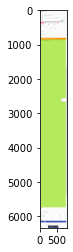

In [17]:
class JDIDatasetBuilder(DatasetBuilder):

    def setUp(self, driver):
        self.logger.info(f'getting page')
        driver.get(self.url)
        #driver.set_window_size(width=1500, height=8000)
        maximize_window(driver)
        sleep(WAIT_TIME_SECONDS)
        
        
with JDIDatasetBuilder(url=SITE_URLS[0], 
                       dataset_name=DATASET_NAMES[0], 
                       headless=True, 
                       dataset_root_path='./MUI_model/dataset/') as builder:
    
    elements_df = builder.dataset
    dataset_json = builder.dataset_json
    plt.imshow(plt.imread(f'./MUI_model/dataset/images/{DATASET_NAMES[0]}.png'))
    
    
# builder = JDIDatasetBuilder(url=SITE_URL, dataset_name=DATASET_NAME, headless=True)
# elements_df = builder.dataset
# plt.imshow(plt.imread(f'dataset/images/{DATASET_NAME}.png'))

### \# make this cell a CODE cell to collect the dataset
````python

from utils.common import maximize_window

def collect_many_ds(site_urls, dataset_names):
    
    all_dfs = []
    
    with trange(len(site_urls)) as bar:

        for site, ds_name in zip(site_urls, dataset_names):
            
            class JDIDatasetBuilder(DatasetBuilder):
                def setUp(self, driver):
                    self.logger.info(f'getting page')
                    driver.get(self.url)
                    maximize_window(driver=driver)
                    sleep(WAIT_TIME_SECONDS)

            with JDIDatasetBuilder(url=site, 
                                   dataset_name=ds_name, 
                                   headless=True,
                                   dataset_root_path='./MUI_model/dataset/'
                                  ) as builder:
                elements_df = builder.dataset
                dataset_json = builder.dataset_json
                elements_df['idx'] = elements_df.index
                elements_df['ds_name'] = ds_name
                # plt.imshow(plt.imread(f'dataset/images/{ds_name}.png'))
                all_dfs.append(elements_df)
                
            bar.update(1)
            
    df_json_10sites = pd.concat(all_dfs, axis=0)      
    
    return df_json_10sites


elements_df = collect_many_ds(SITE_URLS, DATASET_NAMES)
elements_df.to_pickle('MUI_model/dataset/elements_df.pkl') # CAUTION: Do not use .parquet, it breaks ["attributes"] column
````

In [18]:
# reload dataset

elements_df = pd.read_pickle('MUI_model/dataset/elements_df.pkl')
display(elements_df.shape)


(223524, 15)

In [19]:
elements_df['idx'] = elements_df.index

In [20]:
# dataset_json

In [21]:
from utils import load_gray_image
from matplotlib.patches import Rectangle

## Assign Labels

In [22]:
elements_df['label'] = elements_df.attributes.apply(lambda x: x.get('data-label') if x is not None else None).fillna('n/a')
elements_df['bin_label'] = (elements_df.label != 'n/a').astype(int)


In [23]:
elements_df[elements_df['label'] != 'n/a'].head().T

,125,132,135,141,143
attributes,{'class': 'MuiPaper-root MuiAppBar-root MuiApp...,{'class': 'MuiTypography-root jss3 MuiTypograp...,"{'aria-hidden': 'true', 'class': 'MuiSvgIcon-r...","{'aria-label': 'show 4 new mails', 'class': 'M...","{'class': 'MuiBadge-root', 'data-label': 'badge'}"
displayed,False,False,False,False,False
element_id,8129132610566153468349586812,2270194182566153463981025631,4068484127566153461240651369,5027981058566153463879940164,3829642321566153466176536549
height,64.0,32.0,24.0,0.0,0.0
onmouseenter,None,None,None,None,None
onmouseover,None,None,None,None,None
parent_id,4076359422566153460899523914,7949602371566153469853877883,0412989699566153467305392474,8755100442566153463367283937,1575015539566153465941260843
style,"[align-content, align-items, align-self, align...","[align-content, align-items, align-self, align...","[align-content, align-items, align-self, align...","[align-content, align-items, align-self, align...","[align-content, align-items, align-self, align..."
tag_name,HEADER,H6,svg,BUTTON,SPAN
text,ipsum eiusmod,ipsum eiusmod,None,4,4


## EDA

#### Tag_name

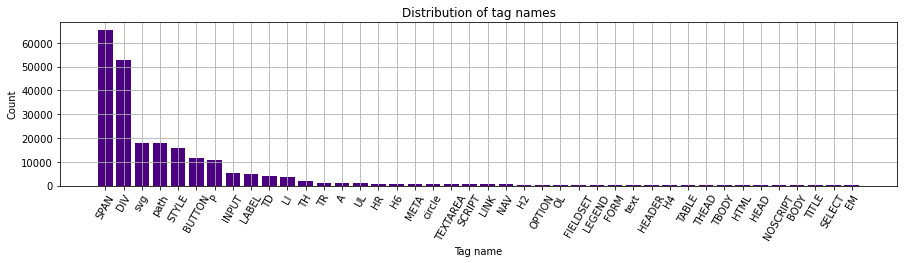

In [24]:
def plot_tag_names(df, col):
    plt.figure(figsize=(15,3))
    plt.grid(True)
    plt.bar(df[col].value_counts().index, height=df[col].value_counts().values, color='indigo')
    plt.title('Distribution of tag names')
    plt.xlabel('Tag name')
    plt.ylabel('Count')
    plt.xticks(rotation=60);

plot_tag_names(elements_df, 'tag_name')

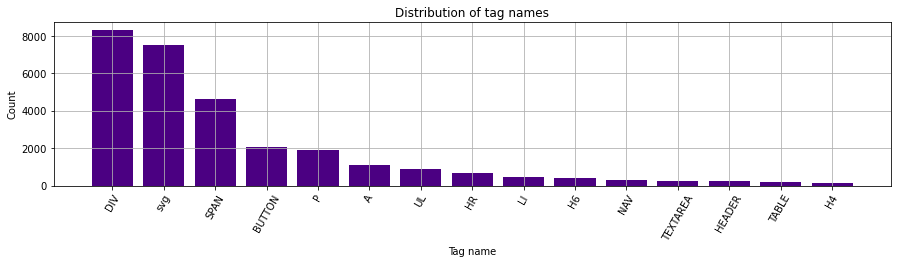

In [25]:
plot_tag_names(elements_df[elements_df.bin_label == 1], 'tag_name')

**CAUTION: We have to pay attention to these tags: SELECT, TABLE, FORM, LINK , UL, LI**

#### Label

In [26]:
elements_df.bin_label.value_counts()

0    194577
1     28947
Name: bin_label, dtype: int64

In [27]:
elements_df.bin_label.value_counts().values / elements_df.shape[0]

array([0.87049713, 0.12950287])

icon                 7518
typography           2722
chip                 2376
radio                2272
button               2128
checkbox             1252
divider              1161
link                  920
list                  794
grid                  764
accordion             696
avatar                440
progress              416
badge                 325
paper                 318
switch                285
text-field            266
textarea-autosize     246
menu                  245
bottom-navigation     236
app-bar               217
snackbar              216
stepper               210
box                   209
backdrop              209
radiogroup            208
popover               207
alert                 204
card                  204
slider                203
container             201
drawer                200
tabs                  189
popper                184
select                184
breadcrumbs           180
table                 172
button-group          123
dialog      

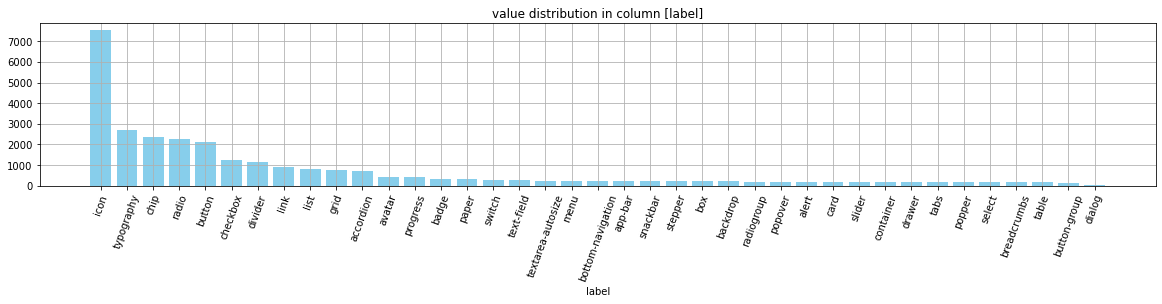

In [28]:
def plot_columns(df, col):
    s = df[df['label'] != 'n/a'].label.value_counts()
    plt.figure(figsize=(20, 3))
    plt.grid(True)
    plt.bar(x=s.index, height = s.values, color='skyblue')
    plt.xticks(rotation=70); 
    plt.xlabel(col)
    plt.title(f"value distribution in column [{col}]")
    display(s)
    
plot_columns(elements_df, 'label')

#### Explore other attributes

In [29]:
elements_df.attributes[:30]

0                                        {'lang': 'en'}
1                                                  None
2                                  {'charset': 'utf-8'}
3              {'href': './favicon.ico', 'rel': 'icon'}
4     {'content': 'width=device-width,initial-scale=...
5         {'content': '#000000', 'name': 'theme-color'}
6     {'content': 'Web site created using create-rea...
7     {'href': './logo192.png', 'rel': 'apple-touch-...
8        {'href': './manifest.json', 'rel': 'manifest'}
9                                                  None
10          {'data-jss': '', 'data-meta': 'MuiSvgIcon'}
11           {'data-jss': '', 'data-meta': 'MuiAvatar'}
12      {'data-jss': '', 'data-meta': 'MuiTouchRipple'}
13       {'data-jss': '', 'data-meta': 'MuiButtonBase'}
14             {'data-jss': '', 'data-meta': 'MuiChip'}
15       {'data-jss': '', 'data-meta': 'MuiIconButton'}
16    {'data-jss': '', 'data-meta': 'PrivateSwitchBa...
17         {'data-jss': '', 'data-meta': 'MuiChe

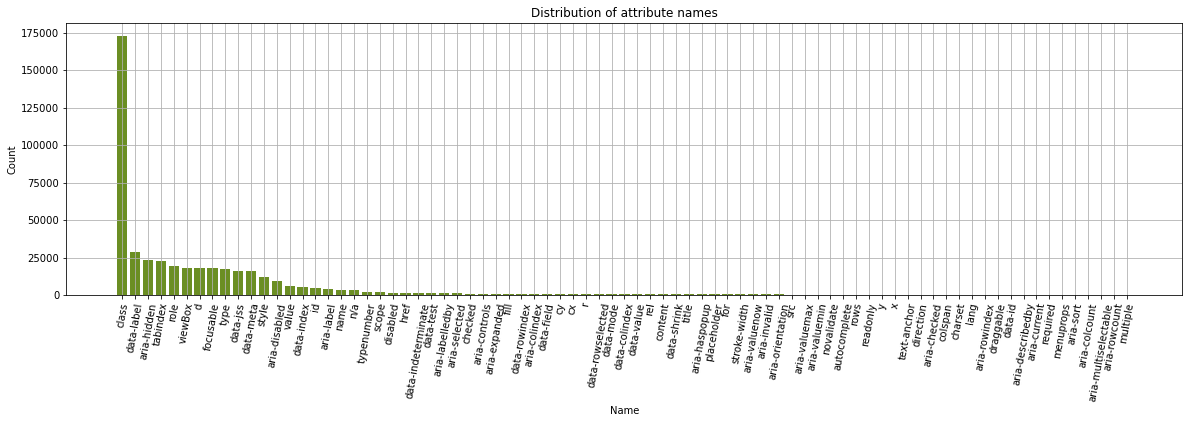

In [30]:
def plot_attr_names(df, col):
    attr_names = df[col].apply(lambda x: list(x.keys()) if x is not None else ['n/a'])
    attr_names = list(itertools.chain.from_iterable(attr_names.to_list()))
    plt.figure(figsize=(20,5))
    plt.grid(True)
    
    plt.bar(pd.Series(attr_names).value_counts().index, 
            height=pd.Series(attr_names).value_counts().values, 
            color='olivedrab')
    
    plt.title('Distribution of attribute names')
    plt.xlabel('Name')
    plt.ylabel('Count')
    plt.xticks(rotation=80);

plot_attr_names(elements_df, 'attributes')

In [31]:
attr_names = elements_df['attributes'].apply(lambda x: list(x.keys()) if x is not None else ['n/a'])
attr_names = list(itertools.chain.from_iterable(attr_names.to_list()))

In [32]:
pd.Series(attr_names).value_counts()['class']/len(elements_df) #77% of elements have a class attribute

0.7735232010880263

- ## [class] attribute content, and filter out [n/a] elemets:

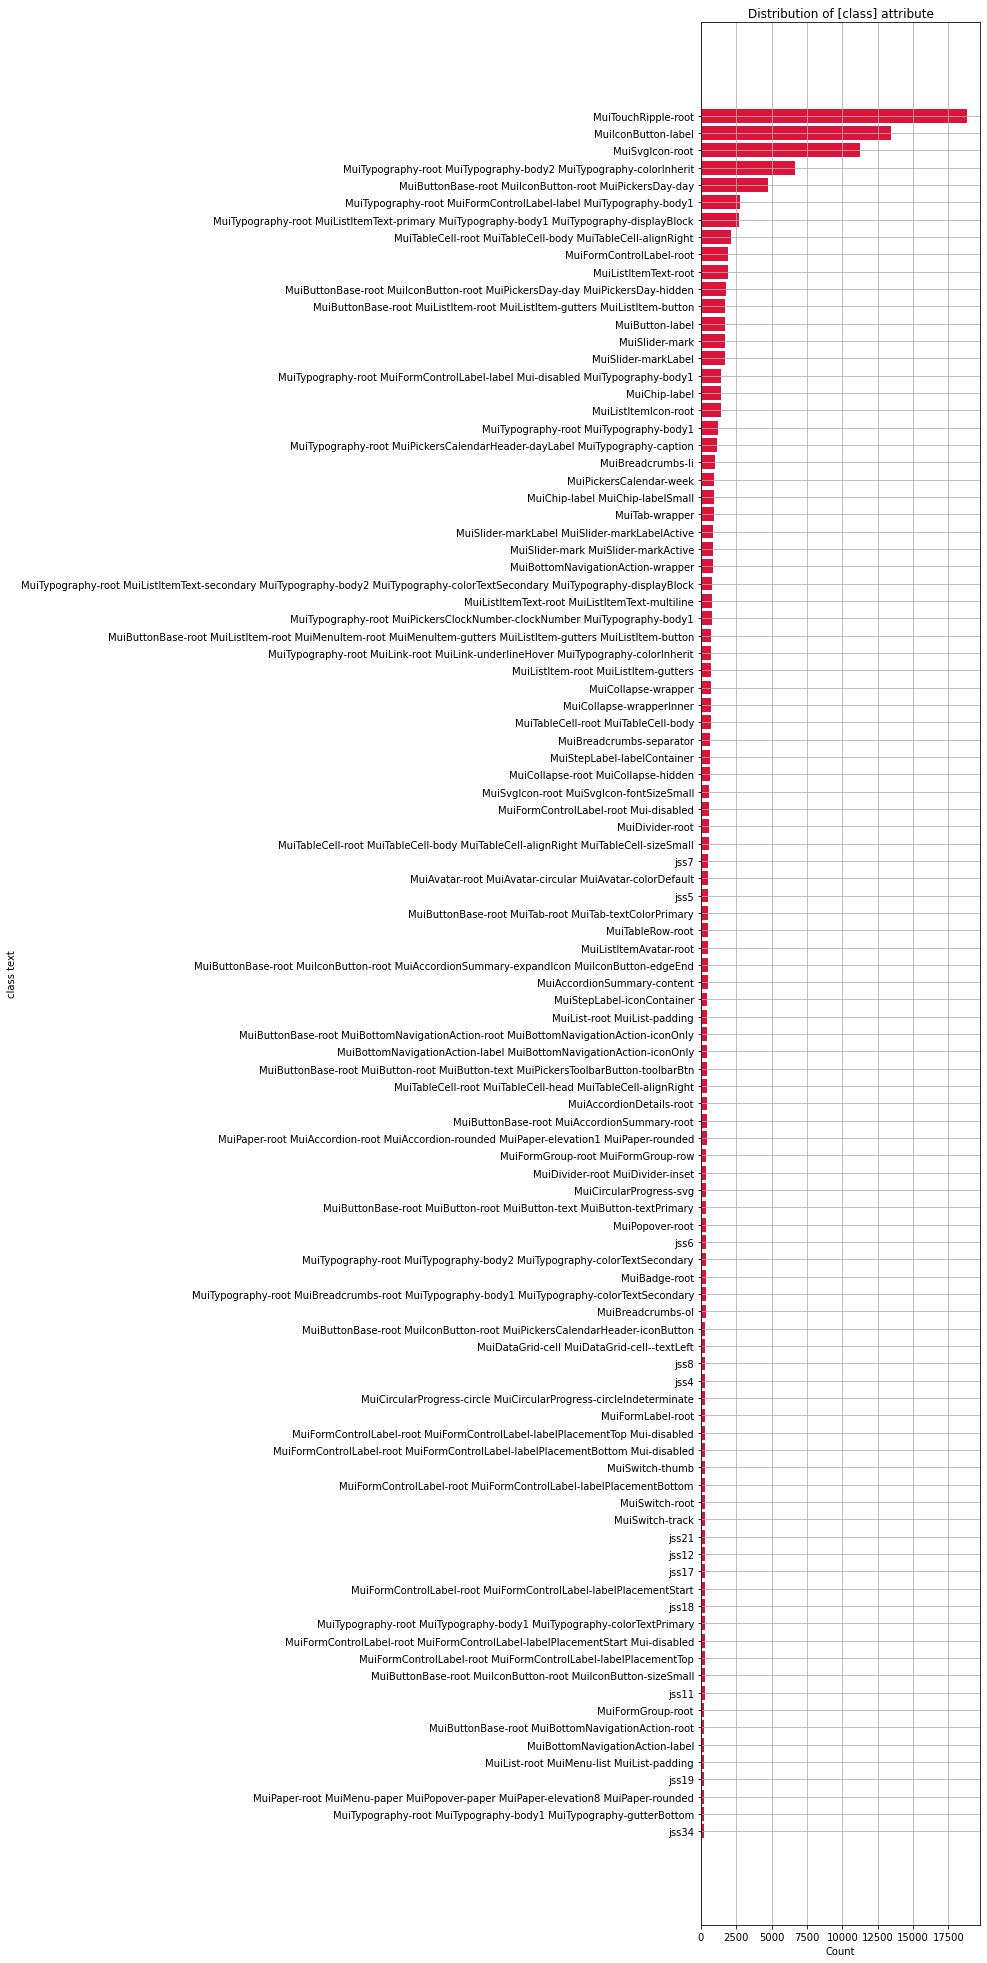

In [33]:
def plot_class_names(df, col, attribute, thresh = 50, color = 'crimson', height = 35):
    
    class_values = df[col].apply(lambda x: x.get(attribute) if x is not None else 'n/a').fillna('n/a')
    
    classes = pd.DataFrame({'name':class_values.value_counts().index, 'value':class_values.value_counts().values})
    classes = classes[classes['name'] != 'n/a']
    
    plt.figure(figsize=(5, height)),
    plt.grid(True)
    plt.barh(classes['name'][classes['value'] > thresh][:100], classes['value'][classes['value']>thresh][:100].astype('int'), color=color)
    plt.title(f'Distribution of [{attribute}] attribute')
    axes = plt.gca()
    axes.invert_yaxis() 
    plt.ylabel(f'{attribute} text')
    plt.xlabel('Count')
    # plt.ticks(rotation='vertical');
    
plot_class_names(elements_df, 'attributes', 'class')

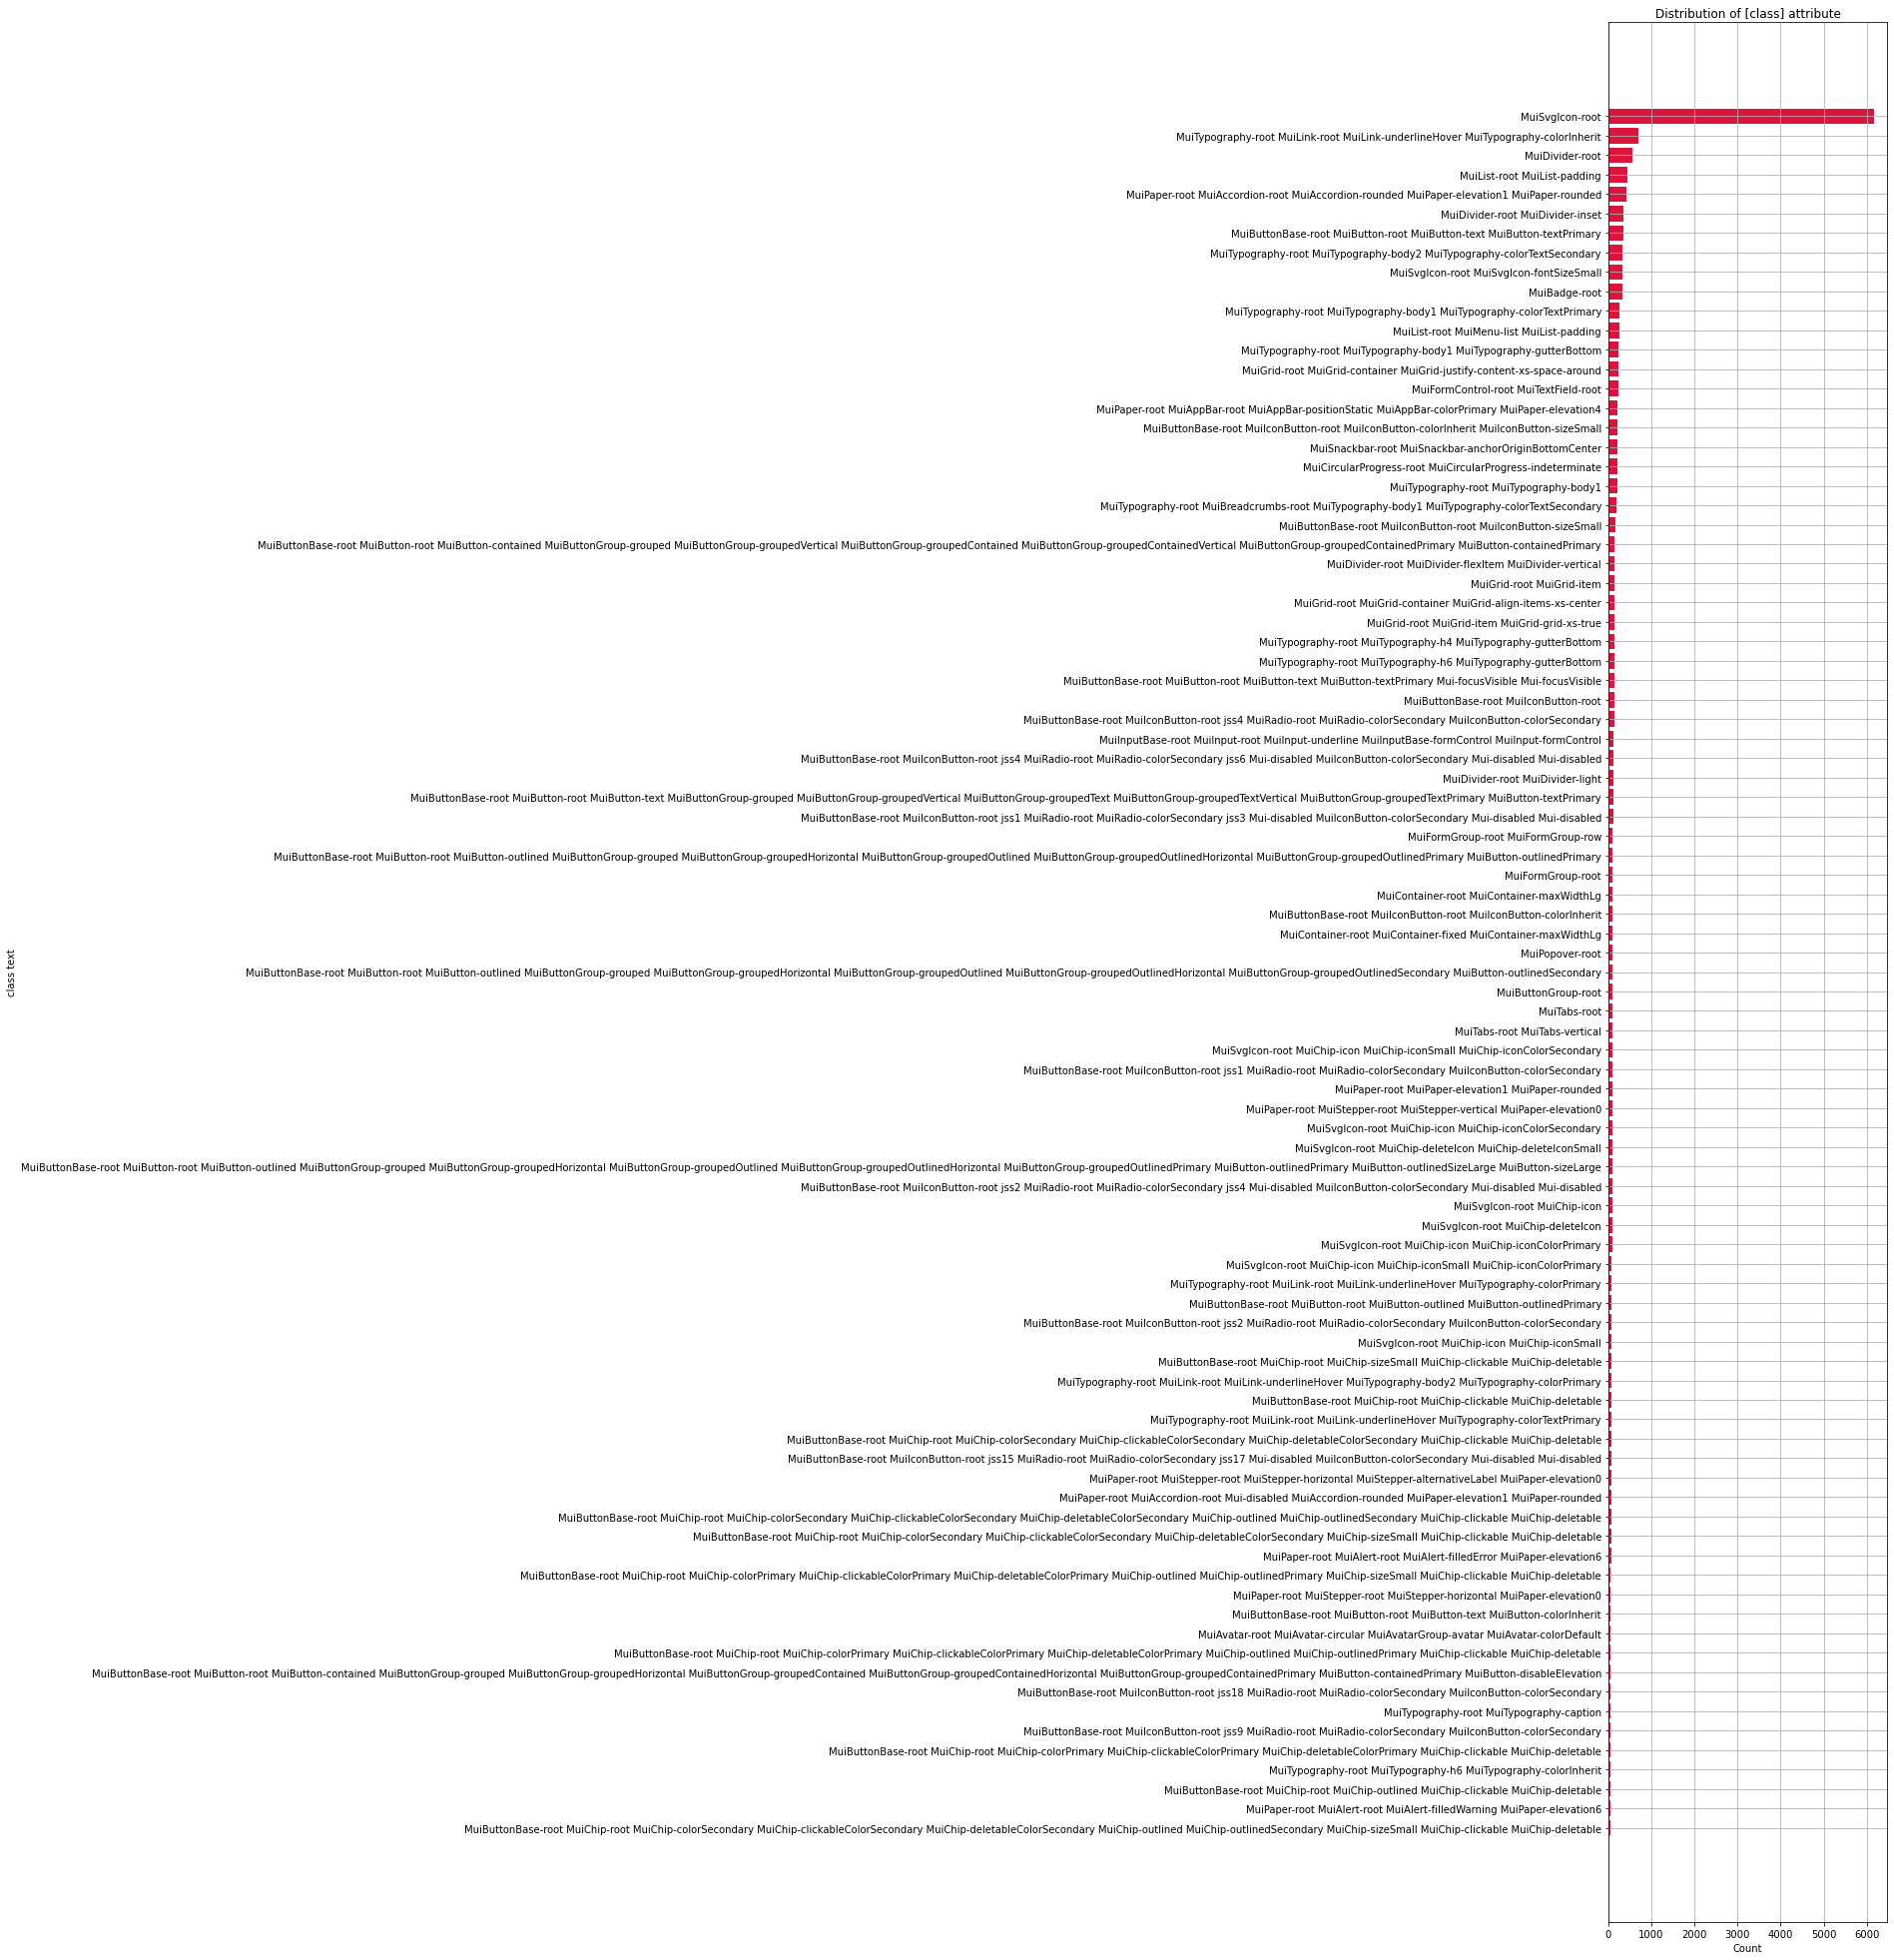

In [34]:
plot_class_names(elements_df[elements_df.bin_label == 1], 'attributes', 'class')

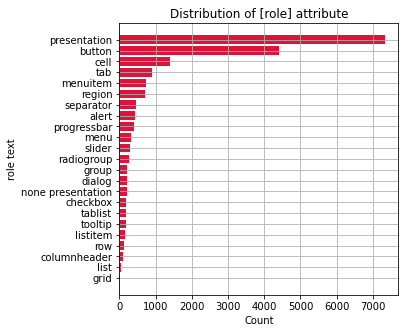

In [35]:
plot_class_names(elements_df, 'attributes', 'role', thresh = 0, height=5)

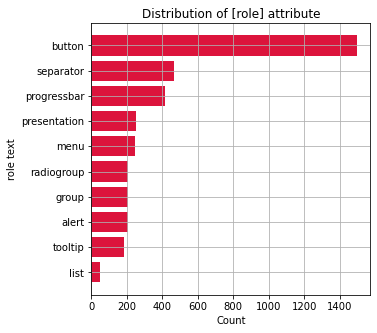

In [36]:
plot_class_names(elements_df[elements_df.bin_label == 1], 'attributes', 'role', thresh = 0, height=5)

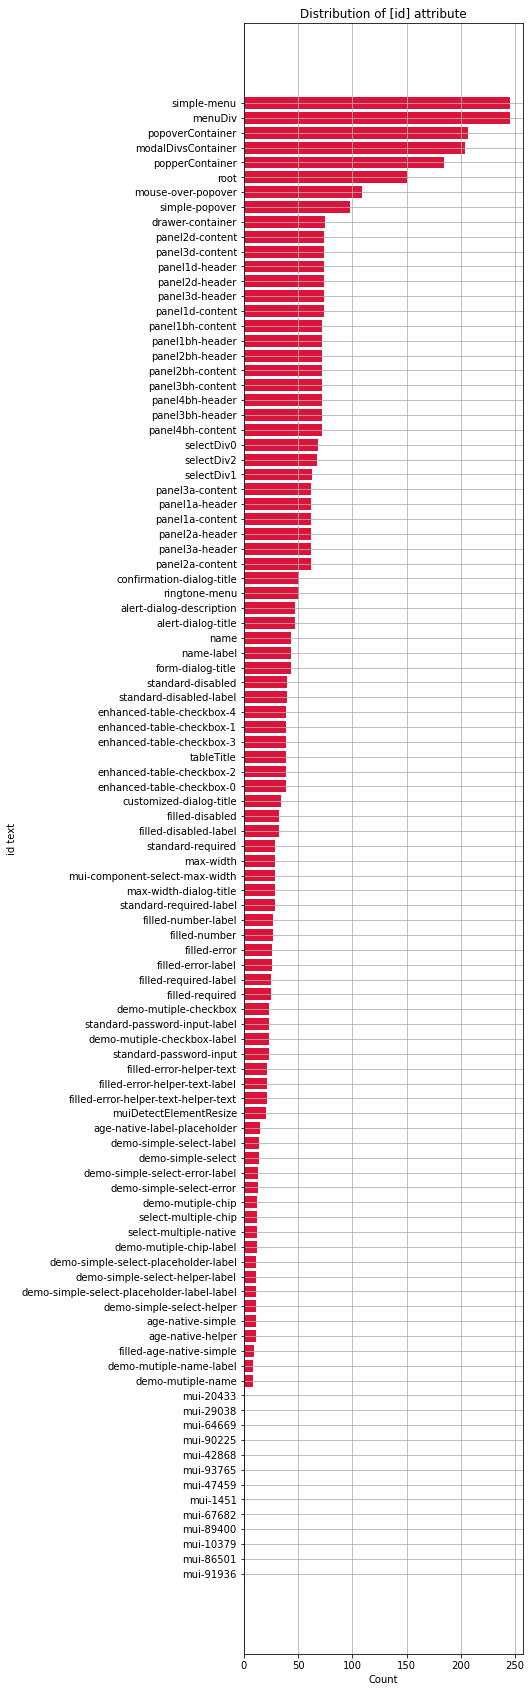

In [37]:
plot_class_names(elements_df, 'attributes', 'id', thresh = 0, height=30)

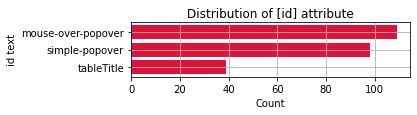

In [38]:
plot_class_names(elements_df[elements_df.bin_label == 1], 'attributes', 'id', thresh = 0, height=1)

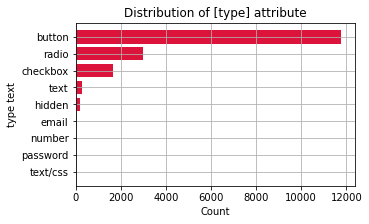

In [39]:
plot_class_names(elements_df, 'attributes', 'type', thresh = 0, height=3)

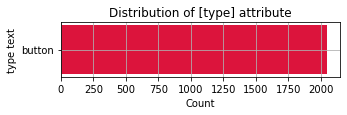

In [40]:
plot_class_names(elements_df[elements_df.bin_label == 1], 'attributes', 'type', thresh = 0, height=1)

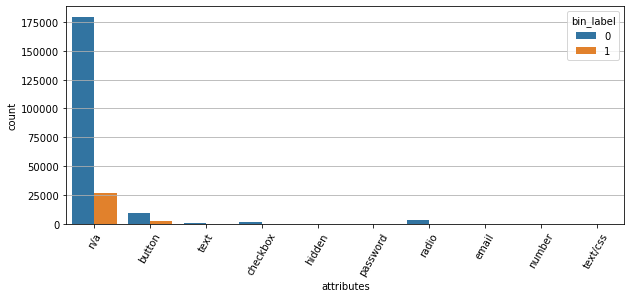

In [41]:
type_values = elements_df['attributes'].apply(lambda x: x.get('type') if x is not None else 'n/a').fillna('n/a')
plt.figure(figsize=(10,4))
plt.grid(True)
sns.countplot(x=type_values, hue = elements_df['bin_label'], data=elements_df)
plt.xticks(rotation=60);


In [42]:
aria_hid_values = elements_df['attributes'].apply(lambda x: x.get('aria-hidden') if x is not None else 'n/a').fillna('n/a')
aria_hid_values.value_counts()/elements_df.shape[0]

n/a     0.895152
true    0.104848
Name: attributes, dtype: float64

In [43]:
aria_hid_values = elements_df[elements_df.bin_label == 1]['attributes'].apply(lambda x: x.get('aria-hidden') if x is not None else 'n/a').fillna('n/a')
aria_hid_values.value_counts()/elements_df[elements_df.bin_label == 1].shape[0]

n/a     0.726327
true    0.273673
Name: attributes, dtype: float64

In [44]:
viewBox_values = elements_df[elements_df.label != 'n/a']['attributes'].apply(lambda x: x.get('viewBox') if x is not None else 'n/a').fillna('n/a')

In [45]:
viewBox_values.value_counts()

n/a          21429
0 0 24 24     7518
Name: attributes, dtype: int64

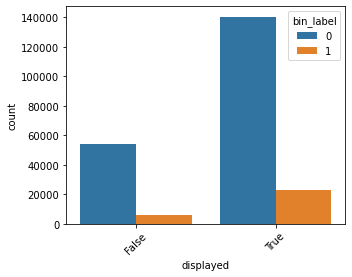

In [46]:
plt.figure(figsize=(5,4))
sns.countplot(x=elements_df['displayed'], hue = elements_df['bin_label'])
plt.xticks(rotation=45);

In [47]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(elements_df['displayed'],elements_df['bin_label']))


(805.6901542704437,
 3.125536679057003e-177,
 1,
 array([[ 52244.62612069,   7772.37387931],
        [142332.37387931,  21174.62612069]]))

- ## data-metadata

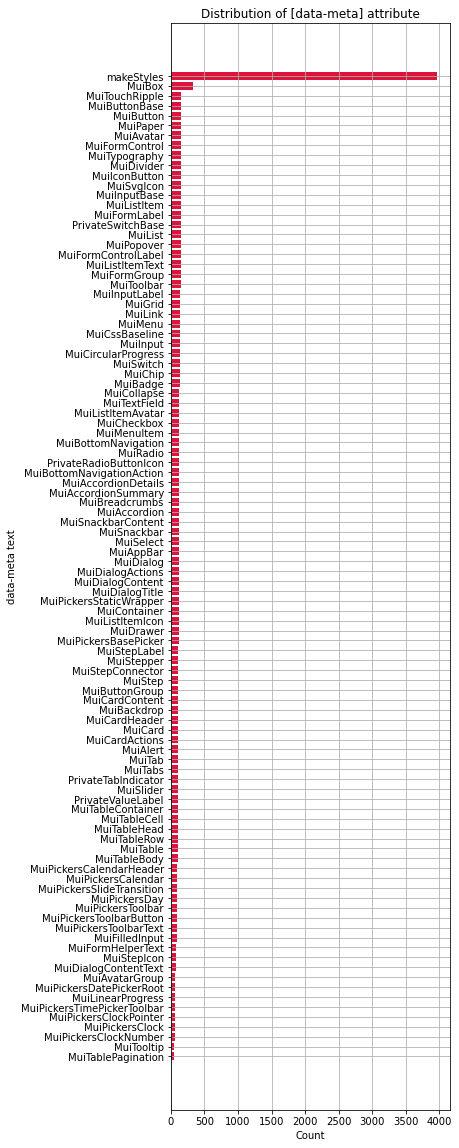

In [48]:
plot_class_names(elements_df, 'attributes', 'data-meta', thresh = 0, height=20)

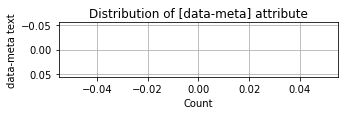

In [49]:
plot_class_names(elements_df[elements_df.bin_label == 1], 'attributes', 'data-meta', thresh = 0, height=1)

- ## tag D is useless

In [50]:
# plot_class_names(elements_df, 'attributes', 'd', thresh = 0, height=35)

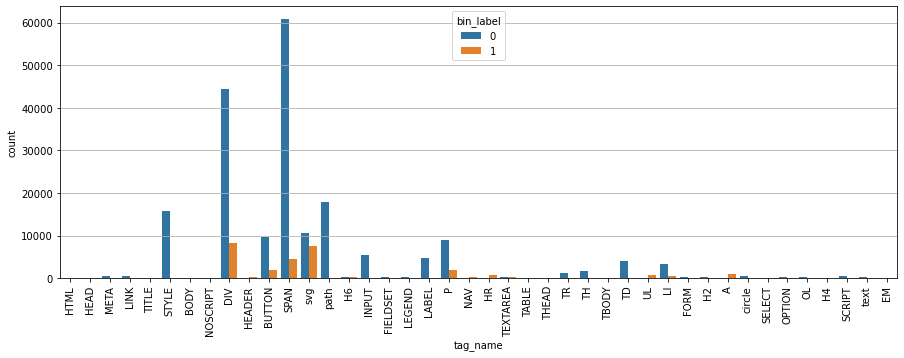

In [51]:
plt.figure(figsize=(15,5))
plt.grid(True)
sns.countplot(x=elements_df['tag_name'], hue = elements_df['bin_label'], data=elements_df)
plt.xticks(rotation=90);

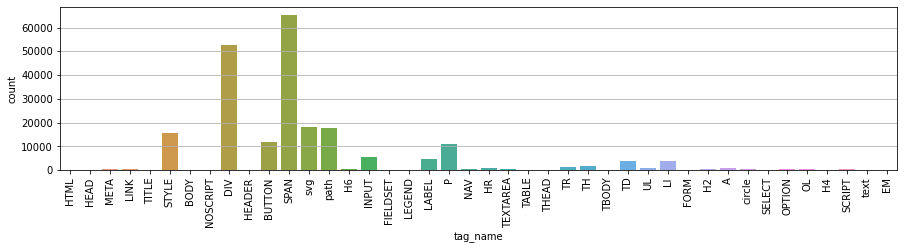

In [52]:
plt.figure(figsize=(15,3))
plt.grid(True)
sns.countplot(x=elements_df.tag_name) #, data=elements_df)
plt.xticks(rotation=90);

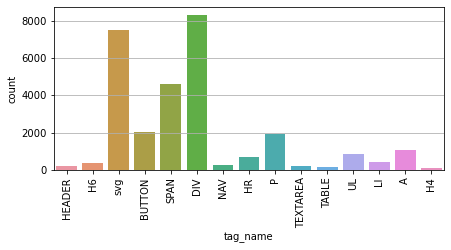

In [53]:
plt.figure(figsize=(7,3))
plt.grid(True)
sns.countplot(x=elements_df[elements_df.bin_label == 1].tag_name) #, data=elements_df)
plt.xticks(rotation=90);

- ## attribute ["class"]

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

In [55]:
attr_class_series = elements_df.attributes.apply(lambda x: None if x is None else x.get('class')).fillna('')
attr_class_series.value_counts()

                                                                                                               50623
MuiTouchRipple-root                                                                                            18789
MuiIconButton-label                                                                                            13442
MuiSvgIcon-root                                                                                                11244
MuiTypography-root MuiTypography-body2 MuiTypography-colorInherit                                               6678
                                                                                                               ...  
MuiSlider-thumb MuiSlider-thumbColorPrimary jss12 jss11                                                            1
MuiTypography-root jss41 MuiTypography-caption MuiTypography-colorTextSecondary MuiTypography-displayBlock         1
MuiAvatar-root MuiAvatar-circular jss73 MuiAvatarGroup-avatar Mu

In [56]:
cv = CountVectorizer()

In [57]:
attr_class_series.values

array(['', '', '', ..., '', '', ''], dtype=object)

In [58]:
cv.fit(attr_class_series.values)

CountVectorizer()

In [59]:
len(cv.vocabulary_.keys())

489

In [60]:
vocabulary = sorted([v for v in cv.vocabulary_.keys() if re.match(r'^[a-z]+$',v ) and len(v) > 2])

In [61]:
len(vocabulary)

370

In [62]:
from scipy.stats import chi2_contingency

In [63]:
stat, p, dof, expected = chi2_contingency(pd.crosstab(elements_df['label'], elements_df['tag_name'].fillna('n/a')))

In [64]:
len(expected[expected < 5])/len(expected)

30.4

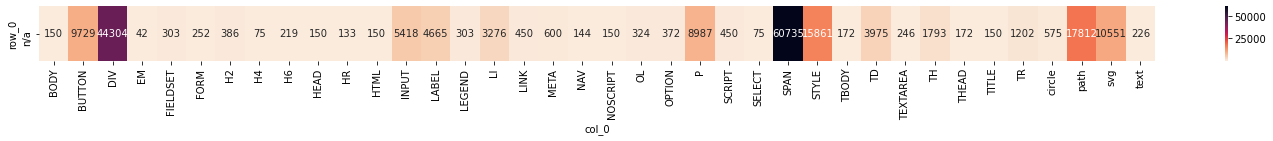

In [65]:
plt.figure(figsize=(25, 1))

sns.heatmap(
    pd.crosstab(
        np.array(elements_df['label'][elements_df['label'] == 'n/a']),
        np.array(elements_df['tag_name'][elements_df['label'] == 'n/a'])
    ), 
    cmap='rocket_r', annot=True, fmt='g'
);

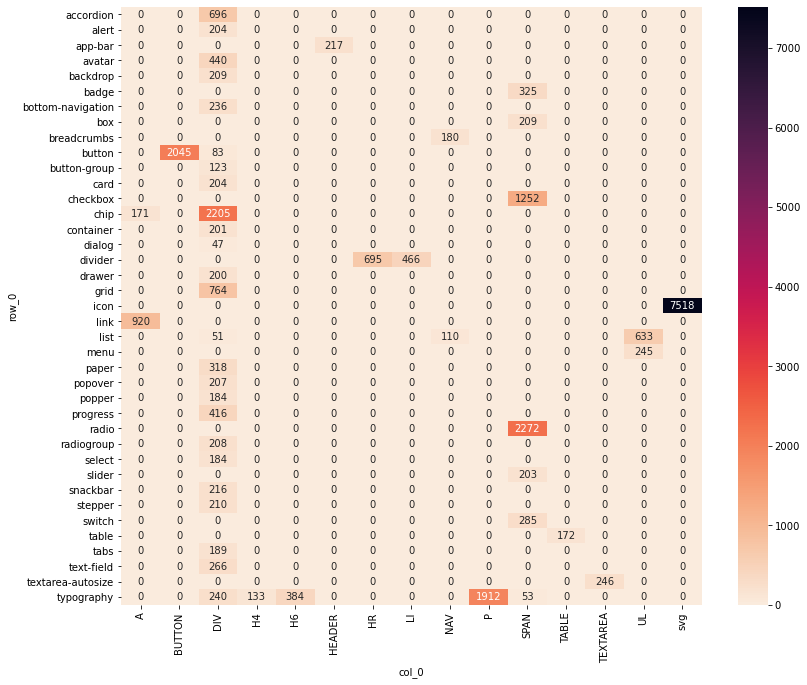

In [66]:
plt.figure(figsize=(13,11))
sns.heatmap(
    pd.crosstab(np.array(elements_df['label'][elements_df['label'] != 'n/a']),
                np.array(elements_df['tag_name'][elements_df['label'] != 'n/a'])), 
    cmap='rocket_r', 
    annot=True, 
    fmt='g'
);

In [67]:
elements_df['class'] = elements_df.attributes.apply(lambda x: None if x is None else x.get('class')).fillna('')

In [68]:
elements_df['class']

0                          
1                          
2                          
3                          
4                          
               ...         
1382                       
1383    MuiTouchRipple-root
1384                       
1385                       
1386                       
Name: class, Length: 223524, dtype: object

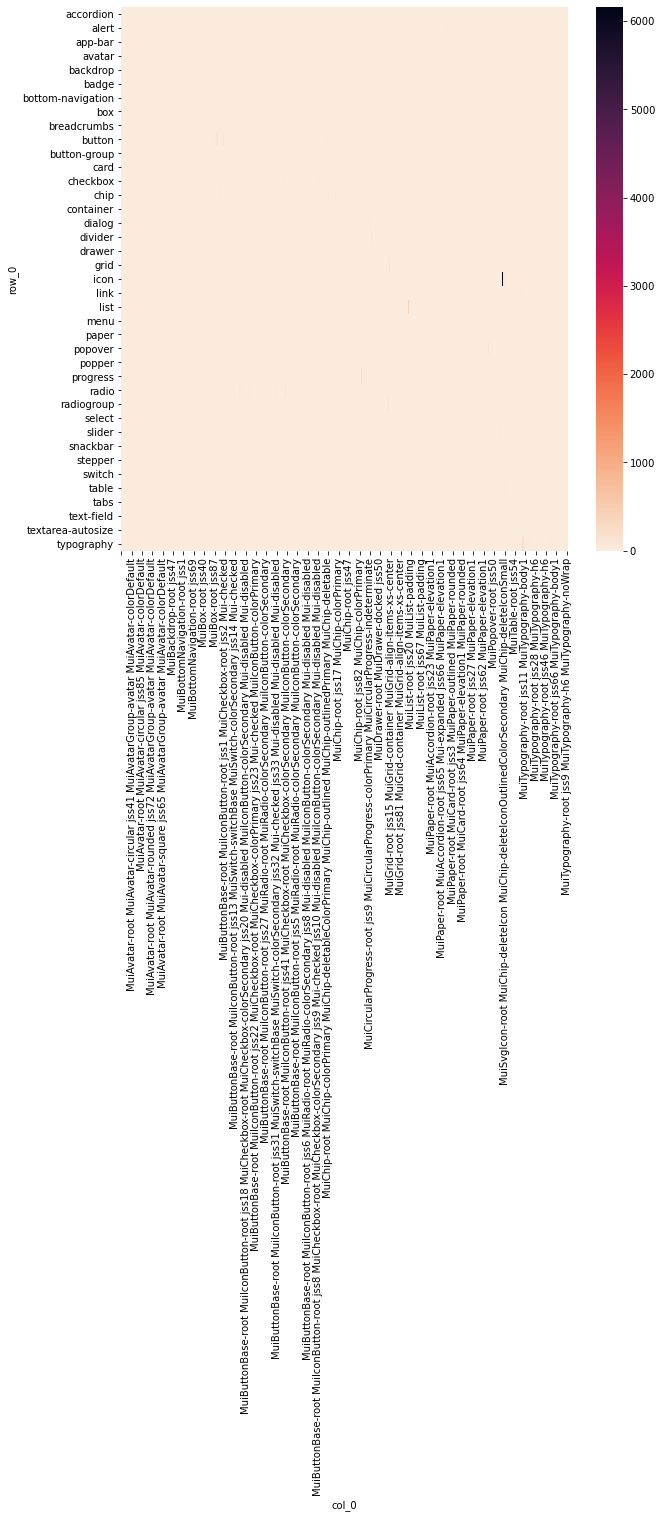

In [69]:
plt.figure(figsize=(10,10))

sns.heatmap(
    pd.crosstab(np.array(elements_df['label'][elements_df['label'] != 'n/a']),
                np.array(elements_df['class'][elements_df['label'] != 'n/a'])), 
    cmap='rocket_r',
    fmt='g'
);

In [70]:
from collections import defaultdict

In [71]:
siblings_dict = defaultdict(dict)
with trange(elements_df.shape[0]) as bar:
    
    for idx, r in elements_df.iterrows():
        if (r.parent_id == r.element_id) or (r.parent_id is None):
            bar.update(1)
            continue

        p = siblings_dict[r.parent_id]
        #print(p)
        #print(siblings_dict)
        p[r.element_id] = idx
        #print(p)
        #print(siblings_dict)
        bar.update(1)

  0%|          | 0/223524 [00:00<?, ?it/s]